# Evaluation for Regression

Model evaluation is very important since we need to understand how well our model is performing. In comparison to classification, performance of a regression model is slightly harder to determine because, unlike classification, it is almost impossible to predict the exact value of a target variable. Therefore, we need a way to calculate how close our prediction value is to the real value.

There are different model evaluation metrics that are used popularly for regression models which we are going to dive into in the following sections.

## Mean Absolute Error

Mean absolute error is a very intuitive and simple technique, therefore also popular. It is basically the average of the distances between the predicted and the true values. Basically the distances between the predicted and the real values are also the error terms. The overall error for the whole data is the average of all prediction error terms. We take the absolute of the distances/errors to prevent negative and positive terms/errors from cancelling each other. 


$$ MAE = \frac{1}{N} \sum\limits_{i=1}^{N}{|y_i - ŷ_i|} $$

### Advantages

*  MAE is not sensitive to outliers. Use MAE when you do not want outliers to play a big role in error calculated.

### Disadvantages

*  MAE is not differentiable globally. This is not convenient when we use it as a loss function, due to the gradient optimization method.

## Mean Squared Error (MSE)

MSE is one of widely used metrics for regression problems. MSE is the the measure of average of squared distance between the actual values and the predicted values. Squared terms help to also take into consideration of negative terms and avoid cancellation of the total error between positive and negative differences.

$$ MSE = \frac{1}{N} \sum\limits_{i=1}^{N}{(y_i - ŷ_i)^2} $$

### Advantages

*  Graph of MSE is differantiable which means it can be easily used as a loss function.
*  MSE can be decomposed into variance and bias squared. This helps us understand the effect of variance or bias in data to the overall error.

$$ MSE(ŷ) = Var(ŷ) + (Bias(ŷ))^2 $$

### Disadvantages

*  The value calculated MSE has a different unit than the target variable since it is squared. (Ex. meter --> meter^2)
*  If there exists outliers in the data, then they are going to result in a larger error. Therefore, MSE is not robust to outliers (this can also be an advantage if you are looking to penalize outliers).

## Root Mean Squared Error (RMSE)

As the name already suggests, in RMSE we take the root of the mean of squared distances, meaning the root of MSE. RMSE is also a popularly used evaluation metric, especially in deep learning techniques.

$$ RMSE = \sqrt{\frac{1}{N} \sum\limits_{i=1}^{N}{(y_i - ŷ_i)^2} }$$

### Advantages

*  The error calculated has the same unit as the target variables making the interpretation relatively easier.

### Disadvantages

*  Just like MSE, RMSE is also susceptible to outliers.

## R-Squared
!! R-squared may not be informative in some cases, check again if you want to include it in the lecture [Is R-sqaure useless?](https://data.library.virginia.edu/is-r-squared-useless/)!!


R square is a different metric compared to the ones we have discussed until now. It does not directly measure the error of the model. 

R-squared evaluates the scatter of the data points around the fitted regression line. It is the percentage of the target variable variation which the model considers compared to the actual target variable variance. It is also known as the "coefficient of determination" or goodness of fit. 

 $$ R^2 = \frac{\text{Variance considered by model}}{\text{Total variance}} $$

  $$ R^2 = 1 - \frac{SS_{regression}}{SS_{total}} = 1 - \frac{\sum{(y_i - ŷ_i)^2}}{\sum{(y_i - y_{mean})^2}} $$

 As we can see above, R-squared is calculated by dividing the sum of squared error of predictions by the total sum of square, where predicted value is replaced by the mean of real values. 

 R-squared is always between 0 and 1. 0 indicates that the model does not explain any of the variation in the target variable around its mean value. The regression model basically predicts the mean of the parget variable.
 A value of 1 indicates, that the model explains all the variance in the target variable around its mean.

 A larger R-squared value usually indicates that the regression model fits the data better. However, a high R-square model does not necessarily mean a good model. 



R-squared score: 0.977


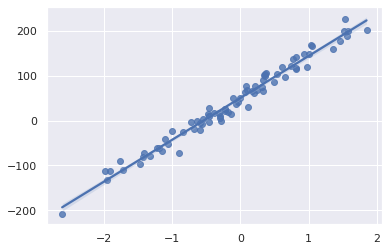

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set_theme(color_codes=True)

X, y = make_regression(n_samples = 80, n_features=1,
                            n_informative=1, bias = 50,
                            noise = 15, random_state=42)

plt.figure()
ax = sns.regplot(x=X,y=y)

model = LinearRegression()
model.fit(X, y)

print('R-squared score: {:.3f}'
     .format(model.score(X, y)))


R-squared score: 0.294


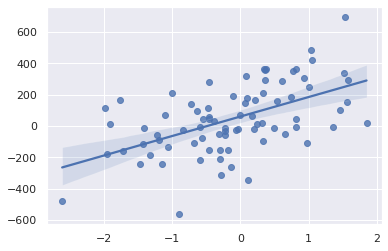

In [ ]:

X, y = make_regression(n_samples = 80, n_features=1,
                            n_informative=1, bias = 50,
                            noise = 200, random_state=42)

plt.figure()
ax = sns.regplot(x=X,y=y)

model = LinearRegression()
model.fit(X, y)

print('R-squared score: {:.3f}'
     .format(model.score(X, y)))

### Advantages
*  R-square is a handy, and an intuitive metric of how well the model fits the data. Therefore, it is a good metric for a baseline model evaluation. However, due to the disadvantages we are going to discuss now, it should be used carefully.

### Disadvantages
*  R-squared can't determine if the predictions are biased, that is why looking at the residual plots in addition is a good idea.

*  R-squared does not necessarily indicate that a regression model is good to go. It is also possible to have a low R-squared score for a good regression model and a high R-squared model for a bad model (especially due to overfitting). 

*  When new input variables (predictors) are added to the model, the R-square is going to increase (because we are adding more variance to the data) independent of an actual performance increase in model. It never decreases when new input variables are added. Therefore, a model with many input variables may seem to have a better performance jsut because it has more input variables. This is an issue which we are going to address with adjusted R-squared.

It is still possible to fit a good model to a dataset with a lot of variance which is likely going to have a low R-square. However, it does not necessarily mean the model is bad if it is still able to capture the general trend in  the dataset, and capture the effect of change of a predictor on the target variables. R-square becomes a big problem when we want to predict a target variable with a high precision, meaning with a small prediction interval.


A high R-squared score also does not necessarily mean a good model because it is not able to detect the bias. Therefore, also checking the residual plots is a good idea. Like we mentioned previously, a model with a high R-squared score can also be overfitting since it captures most of the variance in the data. Therefore, it is always a good idea to check the R-squared score of the predictions from the model and compare it to the R-squared score from the training data. 



## Adjusted R-Squared

We previously mentioned that R-square score never actually decreases but increases when we add more input variables because we increase the variance in the data. To address this issue, we are going to talk about adjusted R-squared.

The adjusted R-sqaured is adjusted version of R-square where the number of input variables in the model are also considered. R-square can penalize the additional input variables given they do not contribute to the model performance. Let's have a look at how it is calculated.

$$ R_a^2 = 1- ((\frac{n-1}{n-k-1})(1-R^2)) $$

where: 

$n = \text{number of data points}$, $k=\text{number of input variables}$


As number of input variables/features increase, the denominator will decrease, R-squared will increase slightly or remain constant if the added features are not relevant, meaning the complete term in paranthesis is going to increase. The resultant adjusted R-squared score is going to decrease because we deducted the increasing term from 1. 

However, if the added input variables are relevant, then the R-squared score will increase much more and the term (1-R2) will decrease a lot. When we subtract the complete term in paranthesis from 1, the overall adjusted R-squared score will increase. You see how the number of added variables and the amount of R-squared increase, help us adjust the R-squared score to account for new variables depending on if they are relevant or not.

In [ ]:
def get_adj_r2(X,y):
  return 1 - (1-model.score(X, y))*(len(X) - 1) / (len(X) - (X.shape[1] - 1) - 1)

In [ ]:
X, y = make_regression(n_samples = 80, n_features=4,
                            n_informative=1, bias = 50,
                            noise = 60, random_state=42)

model = LinearRegression()
model.fit(X, y)

print('R-squared score: {:.3f}'
     .format(model.score(X, y)))


print('Adjusted R-squared score: {:.3f}'
     .format(get_adj_r2(X,y)))

R-squared score: 0.582
Adjusted R-squared score: 0.566


In [ ]:
X, y = make_regression(n_samples = 80, n_features=4,
                            n_informative=1, bias = 50,
                            noise = 60, random_state=42)

model = LinearRegression()
model.fit(X, y)

print('R-squared score: {:.3f}'
     .format(model.score(X, y)))
print('Adjusted R-squared score: {:.3f}'
     .format(get_adj_r2(X,y)))

R-squared score: 0.582
Adjusted R-squared score: 0.566
